In [58]:
import time
import uuid
import json
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd
import seaborn as sns


In [59]:
# Path to the JSON file
file_path = '/Users/nash/Downloads/control.validations-1.json'  # Replace this with the path to your JSON file

In [60]:
# Function to read multiple JSON objects from a file
def read_multiple_json_objects(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return data


# Read data from the file
data = read_multiple_json_objects(file_path)

# Extract ROUGE scores and store them in a dictionary
rouge_data = {}
for item in data:
    client_name = item['sender']['name']
    scores = json.loads(item['data'])
    if client_name not in rouge_data:
        rouge_data[client_name] = {'ROUGE-1': [], 'ROUGE-2': [], 'ROUGE-L': [], 'ROUGE-Lsum': []}
    rouge_data[client_name]['ROUGE-1'].append(scores['rouge1'])
    rouge_data[client_name]['ROUGE-2'].append(scores['rouge2'])
    rouge_data[client_name]['ROUGE-L'].append(scores['rougeL'])
    rouge_data[client_name]['ROUGE-Lsum'].append(scores['rougeLsum'])


In [61]:
rouge_data

{'client1': {'ROUGE-1': [0.40197430496506165,
   0.4021880701341518,
   0.39624015197080925,
   0.40245179763472144,
   0.40207071995798527,
   0.401346881952846,
   0.40132803083083035,
   0.40126600953649094,
   0.37709461864998395,
   0.4002788712536942,
   0.3973512630819204,
   0.38334629597774544,
   0.40045271366660884,
   0.4017216943213421,
   0.4020398757331816,
   0.38191396067884464,
   0.4019324956092346,
   0.40140932895743653,
   0.37889184872847276,
   0.3841677767674245,
   0.40113343125410605,
   0.4012414509815304,
   0.40153257369160716,
   0.39409151933544473,
   0.3766531062951234],
  'ROUGE-2': [0.1745038080040916,
   0.175889971860464,
   0.17010046394976475,
   0.17662029608642188,
   0.1752972689291315,
   0.17525711935935784,
   0.1750969585514713,
   0.17471187695233653,
   0.15525221044054363,
   0.1759891519446972,
   0.17173969366844702,
   0.1606927481908466,
   0.17416693742917905,
   0.1750095697351592,
   0.17483367587502918,
   0.1531091763771516,
  

In [62]:
data = {}
for key, values in rouge_data['client1'].items():
    data[key.replace('-','')] = values
df = pd.DataFrame(data)

In [63]:
df

,ROUGE1,ROUGE2,ROUGEL,ROUGELsum
0,0.401974,0.174504,0.288771,0.287786
1,0.402188,0.175890,0.288559,0.288617
2,0.396240,0.170100,0.281311,0.281078
3,0.402452,0.176620,0.288580,0.288220
4,0.402071,0.175297,0.289302,0.288373
5,0.401347,0.175257,0.287508,0.287716
6,0.401328,0.175097,0.289220,0.288678
7,0.401266,0.174712,0.288749,0.289472
8,0.377095,0.155252,0.280648,0.279759
9,0.400279,0.175989,0.287761,0.288422


In [64]:
# Reference scores
original_model = {
    'rouge1': 0.4216,
    'rouge2': 0.1804,
    'rougeL': 0.3384,
    'rougeLsum': 0.3384
}

In [65]:
mean_scores = df.mean()

In [66]:
mean_scores

ROUGE1       0.395765
ROUGE2       0.169484
ROUGEL       0.285568
ROUGELsum    0.285754
dtype: float64

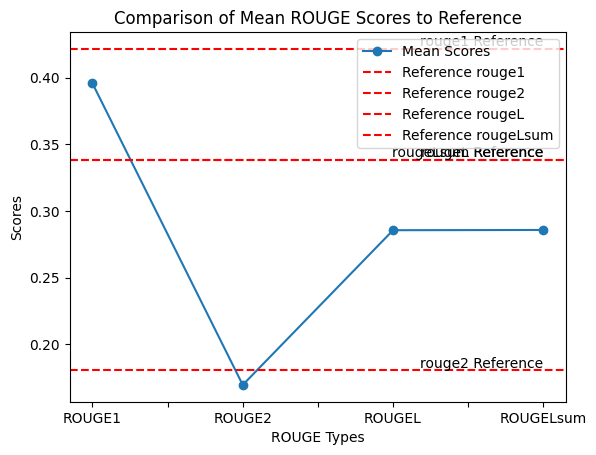

In [67]:
# Plotting
fig, ax = plt.subplots()
mean_scores.plot(kind='line', ax=ax, marker='o', label='Mean Scores')
for key, value in original_model.items():
    ax.axhline(y=value, color='r', linestyle='--', label=f'Reference {key}')
    plt.text(len(df.columns)-1, value, f'{key} Reference', verticalalignment='bottom', horizontalalignment='right')

ax.set_xlabel('ROUGE Types')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Mean ROUGE Scores to Reference')
ax.legend()

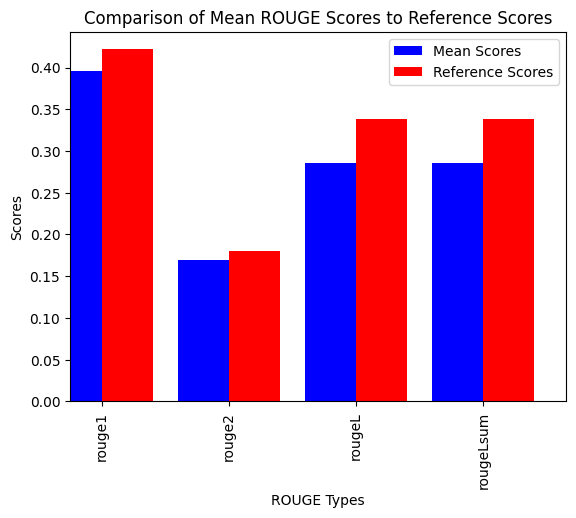

In [68]:


# Convert the data into a DataFrame
data = {}
for key, values in rouge_data['client1'].items():
    data[key.replace('-', '')] = values  # Normalize key names to match original_model keys
df = pd.DataFrame(data)

# Calculate the mean for each ROUGE type
mean_scores = df.mean()

# Creating a DataFrame for the original model scores for easy plotting
ref_scores = pd.Series(original_model)

# Plotting
fig, ax = plt.subplots()
mean_scores.plot(kind='bar', ax=ax, color='blue', width=0.4, position=1, label='Mean Scores')
ref_scores.plot(kind='bar', ax=ax, color='red', width=0.4, position=0, label='Reference Scores')

ax.set_xlabel('ROUGE Types')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Mean ROUGE Scores to Reference Scores')
ax.legend()

plt.show()


In [69]:
df

,ROUGE1,ROUGE2,ROUGEL,ROUGELsum
0,0.401974,0.174504,0.288771,0.287786
1,0.402188,0.175890,0.288559,0.288617
2,0.396240,0.170100,0.281311,0.281078
3,0.402452,0.176620,0.288580,0.288220
4,0.402071,0.175297,0.289302,0.288373
5,0.401347,0.175257,0.287508,0.287716
6,0.401328,0.175097,0.289220,0.288678
7,0.401266,0.174712,0.288749,0.289472
8,0.377095,0.155252,0.280648,0.279759
9,0.400279,0.175989,0.287761,0.288422


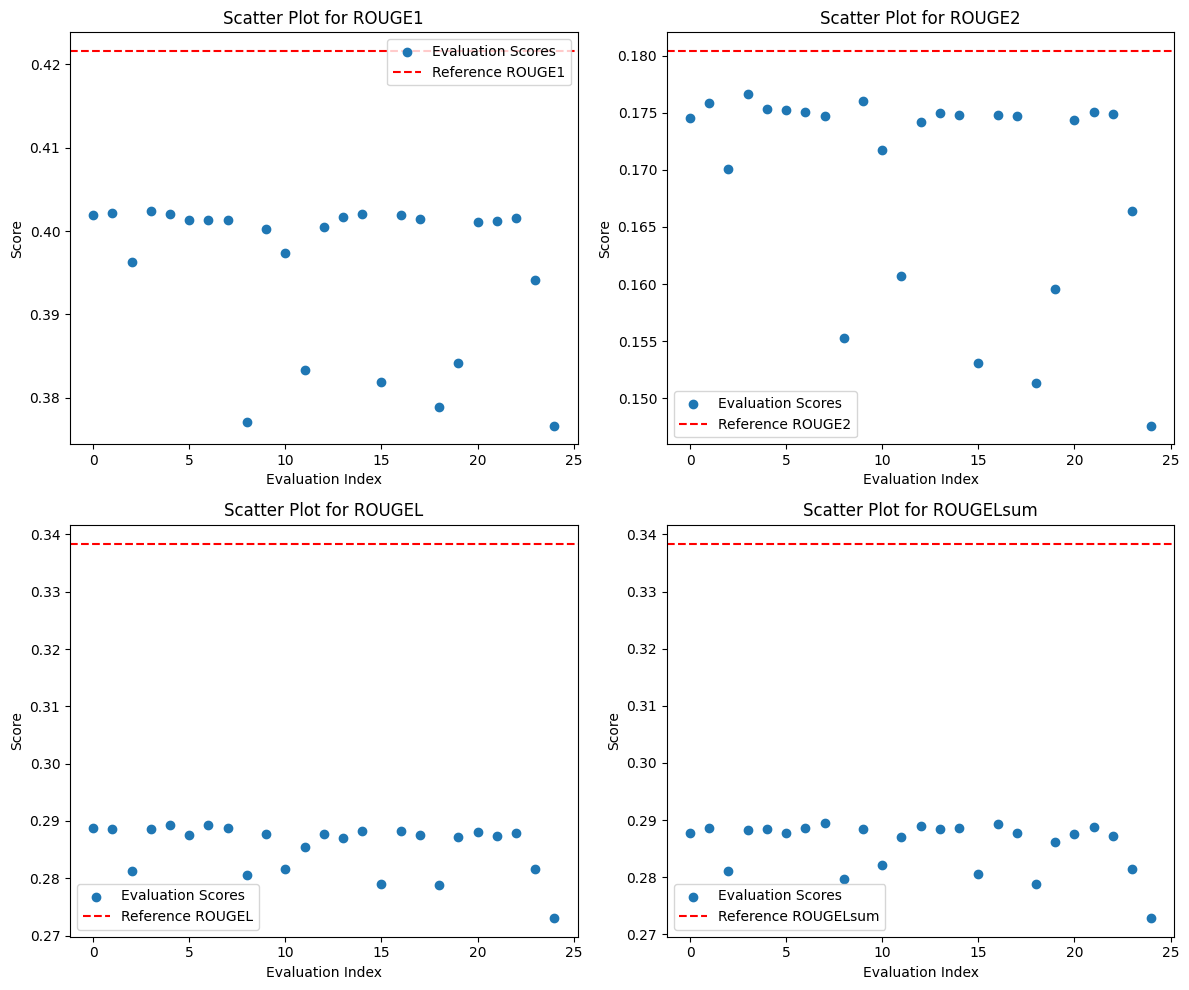

In [70]:
# Reference scores
original_model = {
    'ROUGE1': 0.4216,
    'ROUGE2': 0.1804,
    'ROUGEL': 0.3384,
    'ROUGELsum': 0.3384
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten the axes array for easier iteration
rouge_types = ['ROUGE1', 'ROUGE2', 'ROUGEL', 'ROUGELsum']

for ax, rouge_type in zip(axs, rouge_types):
    ax.scatter(range(len(df[rouge_type])), df[rouge_type], label='Evaluation Scores')
    ax.axhline(y=original_model[rouge_type], color='r', linestyle='--', label=f'Reference {rouge_type}')
    ax.set_title(f'Scatter Plot for {rouge_type}')
    ax.set_xlabel('Evaluation Index')
    ax.set_ylabel('Score')
    ax.legend()

plt.tight_layout()
plt.show()

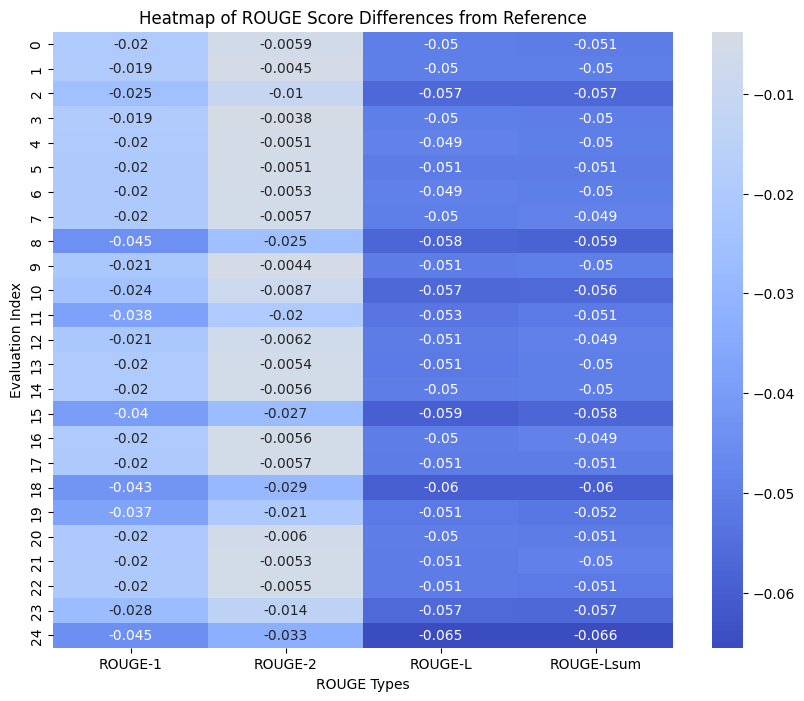

In [71]:


# Reference scores
original_model = {
    'ROUGE-1': 0.4216,
    'ROUGE-2': 0.1804,
    'ROUGE-L': 0.3384,
    'ROUGE-Lsum': 0.3384
}

# Convert the data into a DataFrame
df = pd.DataFrame(rouge_data['client1'])

# Calculate differences from the reference scores
diffs = {}
for col in df.columns:
    diffs[col] = df[col] - original_model[col]

diff_df = pd.DataFrame(diffs)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diff_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of ROUGE Score Differences from Reference')
plt.xlabel('ROUGE Types')
plt.ylabel('Evaluation Index')

plt.show()


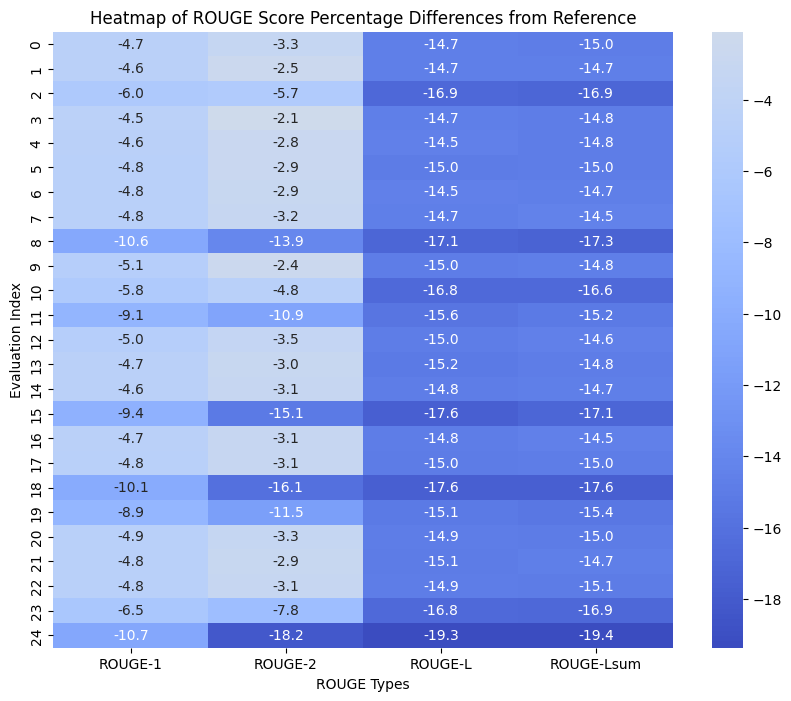

In [72]:

# Reference scores
original_model = {
    'ROUGE-1': 0.4216,
    'ROUGE-2': 0.1804,
    'ROUGE-L': 0.3384,
    'ROUGE-Lsum': 0.3384
}

# Convert the data into a DataFrame
df = pd.DataFrame(rouge_data['client1'])

# Calculate percentage differences from the reference scores
percentage_diffs = {}
for col in df.columns:
    percentage_diffs[col] = ((df[col] - original_model[col]) / original_model[col]) * 100

percent_diff_df = pd.DataFrame(percentage_diffs)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(percent_diff_df, annot=True, cmap='coolwarm', center=0, fmt=".1f")
ax.set_title('Heatmap of ROUGE Score Percentage Differences from Reference')
ax.set_xlabel('ROUGE Types')
ax.set_ylabel('Evaluation Index')

plt.show()


ROUGE-1       0.395765
ROUGE-2       0.169484
ROUGE-L       0.285568
ROUGE-Lsum    0.285754
dtype: float64
ROUGE-1       -6.127905
ROUGE-2       -6.050876
ROUGE-L      -15.612362
ROUGE-Lsum   -15.557348
dtype: float64


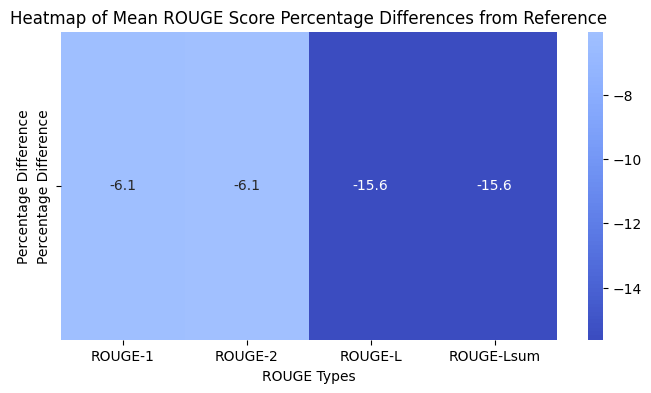

In [73]:

mean_scores = df.mean()
# Calculate percentage differences from the reference scores for mean values
percentage_diffs = ((mean_scores - pd.Series(original_model)) / pd.Series(original_model)) * 100
print(percentage_diffs)
# Convert to DataFrame for heatmap plotting
percent_diff_df = pd.DataFrame(percentage_diffs, columns=['Percentage Difference'])

# Plotting the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(percent_diff_df.T, annot=True, cmap='coolwarm', center=0, fmt=".1f")
ax.set_title('Heatmap of Mean ROUGE Score Percentage Differences from Reference')
ax.set_xlabel('ROUGE Types')
ax.set_ylabel('Percentage Difference')

plt.show()

In [25]:
print(original_model,mean_scores)

{'ROUGE-1': 0.4216, 'ROUGE-2': 0.1804, 'ROUGE-L': 0.3384, 'ROUGE-Lsum': 0.3384} ROUGE-1       0.395765
ROUGE-2       0.169484
ROUGE-L       0.285568
ROUGE-Lsum    0.285754
dtype: float64


In [55]:
# Calculating the mean of each ROUGE score for both clients
import numpy as np

# Scores for client1 and client2
client1_scores = {
    'ROUGE-1': [0.39988563335479355],
    'ROUGE-2': [0.1748013183118221],
    'ROUGE-L': [0.28879044271855175],
    'ROUGE-Lsum': [0.28819558550244617]
}

client2_scores = {
    'ROUGE-1': [0.403050360499437],
    'ROUGE-2': [0.1760755133159729],
    'ROUGE-L': [0.28864361565928226],
    'ROUGE-Lsum': [0.2886172250642749]
}

# Calculating mean scores for each metric
mean_scores_two_clients = {
    'ROUGE-1': np.mean([client1_scores['ROUGE-1'][0], client2_scores['ROUGE-1'][0]]),
    'ROUGE-2': np.mean([client1_scores['ROUGE-2'][0], client2_scores['ROUGE-2'][0]]),
    'ROUGE-L': np.mean([client1_scores['ROUGE-L'][0], client2_scores['ROUGE-L'][0]]),
    'ROUGE-Lsum': np.mean([client1_scores['ROUGE-Lsum'][0], client2_scores['ROUGE-Lsum'][0]])
}

print(f'two clients {mean_scores_two_clients}')
print(f'original model{original_model}')


two clients {'ROUGE-1': 0.40146799692711527, 'ROUGE-2': 0.17543841581389752, 'ROUGE-L': 0.288717029188917, 'ROUGE-Lsum': 0.28840640528336053}
original model{'ROUGE-1': 0.4216, 'ROUGE-2': 0.1804, 'ROUGE-L': 0.3384, 'ROUGE-Lsum': 0.3384}


In [74]:
# Let's calculate the percentage difference between the mean scores of the two clients and the scores of the original model

# Scores of the original model
original_model_scores = {
    'ROUGE-1': 0.4216,
    'ROUGE-2': 0.1804,
    'ROUGE-L': 0.3384,
    'ROUGE-Lsum': 0.3384
}

# Mean scores for two clients (from previous calculation)
mean_scores_two_clients = {
    'ROUGE-1': 0.40146799692711527,
    'ROUGE-2': 0.17543841581389752,
    'ROUGE-L': 0.288717029188917,
    'ROUGE-Lsum': 0.28840640528336053
}

# Calculating percentage differences
percentage_diffs_two_clients = {metric: ((mean_scores_two_clients[metric] - original_model_scores[metric]) / original_model_scores[metric]) * 100 
                                for metric in mean_scores_two_clients}

percentage_diffs_two_clients


{'ROUGE-1': -4.7751430438531095,
 'ROUGE-2': -2.7503238282164553,
 'ROUGE-L': -14.681728963085986,
 'ROUGE-Lsum': -14.773520897352082}

In [79]:
# THREE clients

client_data = [
    {"rouge1": 0.4006242806370244, "rouge2": 0.17389149935054582, "rougeL": 0.28898898552063723, "rougeLsum": 0.2883757224238896},
    {"rouge1": 0.4021269595655226, "rouge2": 0.17644884910369357, "rougeL": 0.2873733946522191, "rougeLsum": 0.28780582960078305},
    {"rouge1": 0.40198300777814416, "rouge2": 0.1753618382910933, "rougeL": 0.28746206295242915, "rougeLsum": 0.2880284853753654}
]

# Calculate mean scores for each metric
mean_scores_from_file = {
    'ROUGE-1': np.mean([client['rouge1'] for client in client_data]),
    'ROUGE-2': np.mean([client['rouge2'] for client in client_data]),
    'ROUGE-L': np.mean([client['rougeL'] for client in client_data]),
    'ROUGE-Lsum': np.mean([client['rougeLsum'] for client in client_data])
}

# Original model scores
original_model_scores = {
    'ROUGE-1': 0.4216,
    'ROUGE-2': 0.1804,
    'ROUGE-L': 0.3384,
    'ROUGE-Lsum': 0.3384
}

In [82]:
# Correcting the key access for original model scores and recalculating percentage differences

# Adjusting original model scores to use the same keys as the calculated mean scores for consistency
original_model_scores_corrected = {
    'ROUGE-1': 0.4216,
    'ROUGE-2': 0.1804,
    'ROUGE-L': 0.3384,
    'ROUGE-Lsum': 0.3384
}

# Recalculating percentage differences using the corrected keys
percentage_diffs_three_clients = {metric: ((mean_scores_from_file[metric] - original_model_scores_corrected[metric]) / original_model_scores_corrected[metric]) * 100 
                              for metric in mean_scores_from_file}

percentage_diffs_three_clients


{'ROUGE-1': -4.749031627080077,
 'ROUGE-2': -2.8636018578468954,
 'ROUGE-L': -14.910909857635394,
 'ROUGE-Lsum': -14.872927758073473}

In [83]:
percentage_diffs , percentage_diffs_two_clients , percentage_diffs_three_clients

(ROUGE-1       -6.127905
 ROUGE-2       -6.050876
 ROUGE-L      -15.612362
 ROUGE-Lsum   -15.557348
 dtype: float64,
 {'ROUGE-1': -4.7751430438531095,
  'ROUGE-2': -2.7503238282164553,
  'ROUGE-L': -14.681728963085986,
  'ROUGE-Lsum': -14.773520897352082},
 {'ROUGE-1': -4.749031627080077,
  'ROUGE-2': -2.8636018578468954,
  'ROUGE-L': -14.910909857635394,
  'ROUGE-Lsum': -14.872927758073473})